#### Notebook style configuration <span style="font-weight:200;">(optional)</span>

In [1]:
from IPython.display import display, HTML
style = open("dataviz-data/style.css").read()
display(HTML("<style>%s</style>" % style))

### Table of contents <a name="TOC"></a>

* [Introduction](#introduction)
* [Single axes](#single_axes)
* [Multiple axes](#multiple_axes)
* [Catalogue of useful plots](#catalogue)

# 1. Introduction <a name="introduction"></a><span style="float:right;"><a class="small" style="color:black; text-decoration: none; " href="#TOC">[Back to TOC]</a></span>

In this introduction, we'll see how to make a [figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html?highlight=figure#matplotlib.pyplot.figure) and play with the different settings such as to improve the rendering. We'll also see how to compose a figure made of several [subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html) with a moderatly complex layout.



<img src="dataviz-data/anatomy.png" width="50%" align="left" /> <img src="dataviz-data/subplots.png" width="50%" />


These images come from the [cheatsheets](https://github.com/matplotlib/cheatsheets). All credit goes to [Nicolas P. Rougier](https://github.com/rougier), who has also written an amazing book on [scientific visualization using Python and matplotlib](https://github.com/rougier/scientific-visualization-book).



---

# 2. Single axes <a name="single_axes"></a> <span style="float:right;"><a class="small" style="color:black; text-decoration: none;" href="#TOC">[Back to TOC]</a></span>

We'll start by playing with a very simple exampe (sine and cosine trigonometric functions) using the [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) function and see what options are avalaible to us. We'll see there exists a (very) large number of options that allow to obtain quite different outputs. More precisely, you can modify any aspect of a figure and obtain the precise rendering you've in mind. The only difficulty is to know what are these options and how to apply them.

**Note** The standard way of importing maplotlib is to write `import matplotlib.pyplot as plt` and then use the `plt` prefix in front of matplotlib related functions. In some rather rare cases, we also use the `matplotlib` prefix, but most of the time we only need `plt`.

## 2.1 Data preparation

Before starting any plot, we need first to have some data to plot. Such data can originate from your own experiment or analysis but for the sake of simplicity, we'll generate our own data using the [numpy](https://numpy.org) library. For the sine and cosine functions, we simply generate 257 values linearly spaced between -π and +π and we compute the sine and cosine of these values.

In [50]:
import numpy as np

N = 257
X = np.linspace(-np.pi, np.pi, N, endpoint=True)
C, S = np.cos(X), np.sin(X)

X is now a numpy array with 257 values ranging from -π to +π (included). C is the cosine (257 values) and S is the sine (257 values). We're ready to plot them.

## 2.2 Plotting with defaults

Let's draw our first figure and observe what the result looks like.

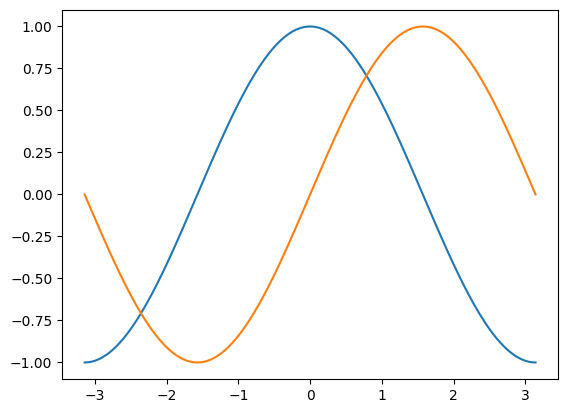

In [3]:
import matplotlib.pyplot as plt

plt.plot(X, C)
plt.plot(X, S)
plt.show();

**Exercise together:** What aspects of this plot could be improved?

**Answer:**

**Exercise together:** We chose the value `257` arbitrarily. But what if we had chosen fewer points? The plot is below--why does it look like what it does? What does this mean for plotting? What if I plotted 25,700 points instead?

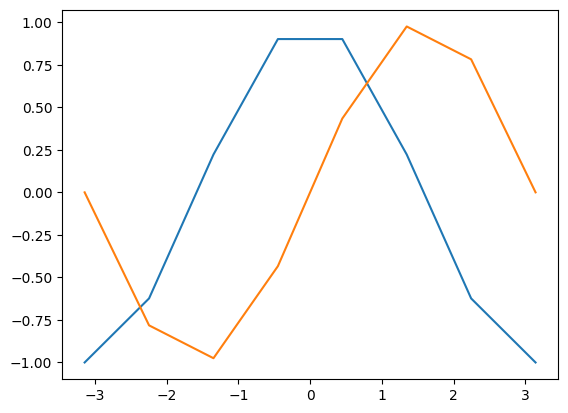

In [4]:
Xfew = np.linspace(-np.pi, np.pi, 8, endpoint=True)
Cfew, Sfew = np.cos(Xfew), np.sin(Xfew)

plt.plot(Xfew, Cfew)
plt.plot(Xfew, Sfew)
plt.show();

**Answer:** 

#### __Extra Notes__: The two interfaces

Note that when dealing with figures and axes, `matplotlib` has two parallel interfaces: the `pyplot` interface (`plt.xlabel`) and the object-oriented interface (`ax.set_xlabel`). 

The pyplot interface was developed first, and its methods are generally applied to the current axes or figure. It is recommended to use the object-oriented interface, as it is both clearer code and more flexibile.

## 2.3 Customizing the plot

Let's modify the plot to make it look nicer (and convey more information about our data).

#### Adjusting the figure size

Let's start by making the figure a bit larger. We will use the parameter `figsize` to denote the size of our figure as `(width, height)`, which is a tuple of float values, in inches.

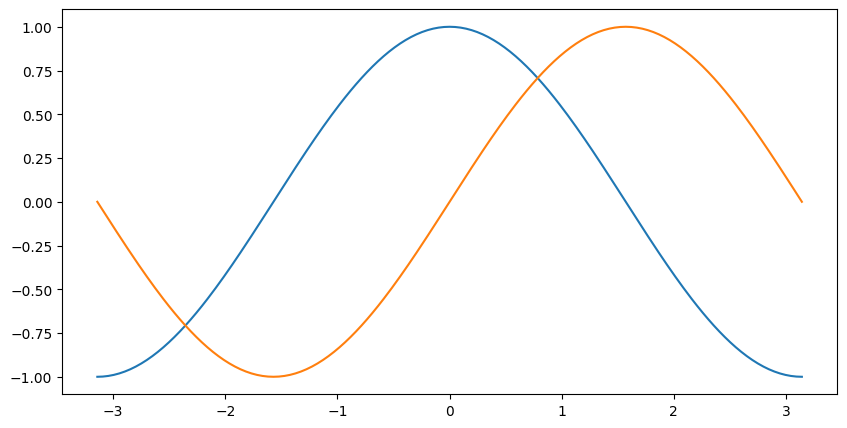

In [5]:
fig = plt.figure(figsize=(10,5))

plt.plot(X, C)
plt.plot(X, S)
plt.show();

Note: to make this change pernanent in *all* of our subsequent figures, we will set the _global parameters_ of `matplotlib`

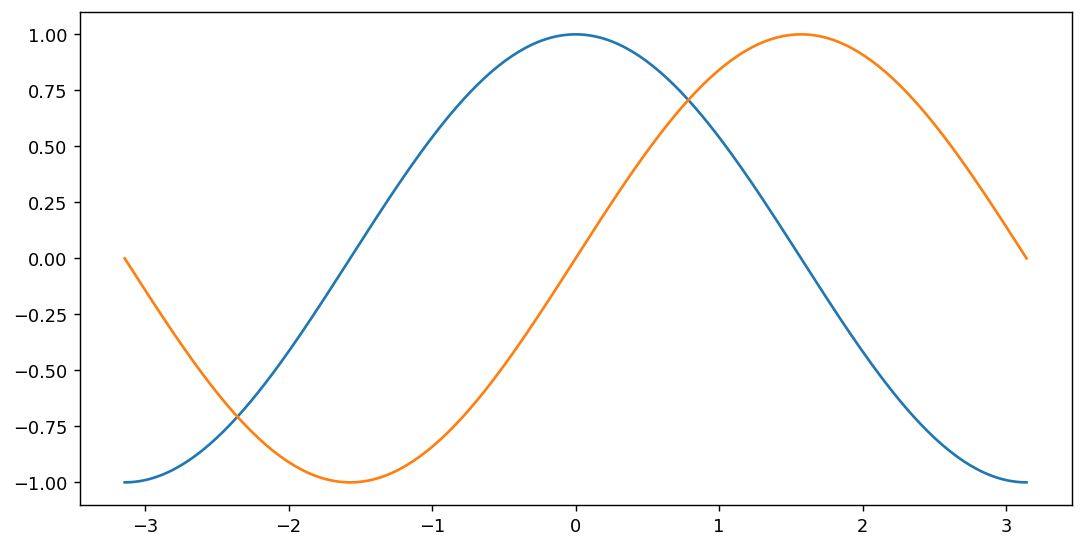

In [6]:
# Set default figure size 
plt.rcParams["figure.figsize"] = (10,5)

# Set default figure dpi
plt.rcParams["figure.dpi"] = 128

# Make a new figure, note that it has the same size as the figure before without using figsize!
fig_new = plt.figure()

plt.plot(X, C)
plt.plot(X, S)
plt.show();

#### Line styles

Solid line is the default line style but there exist [several other styles](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html) such as dashed lines (`linestyle="--"`), dotted lines (`linestyle=":"`), etc. You can also combine a style with a marker. For example, we can add circular markers at regular intervals. To do that, we specify the `marker` symbol as `'o'`, the marker color and the spacing between markers (else you will have a marker at each data  point).

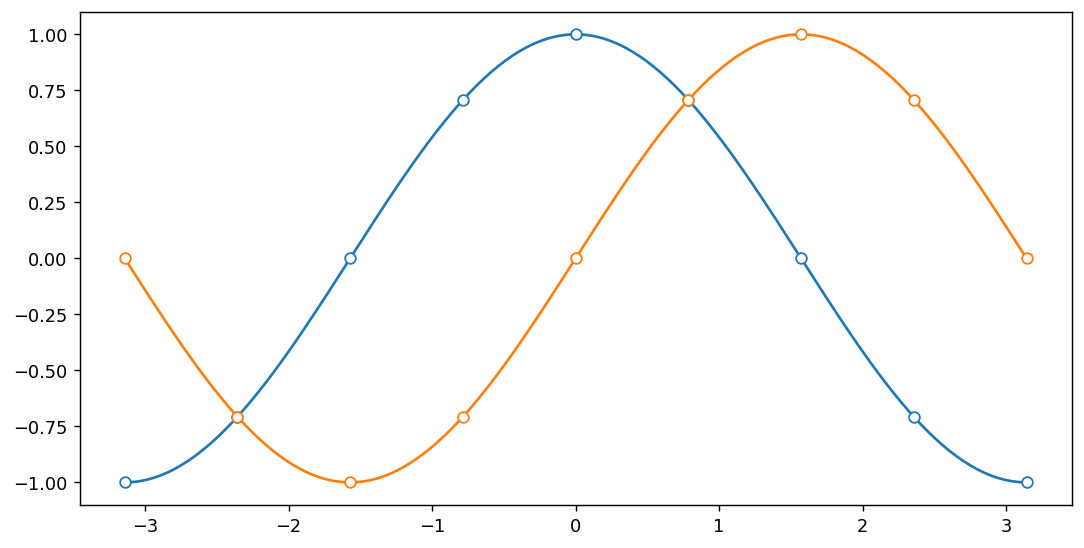

In [7]:
fig,ax = plt.subplots() # another way to create a figure

ax.plot(X, C, marker='o', markevery=32, markerfacecolor="white")
ax.plot(X, S, marker='o', markevery=32, markerfacecolor="white")

plt.show();

#### Tick positions and labels

Ticks on the x axis are not ideal positioned because they do not show the interesting values (+/-$\pi$,+/-$\pi$/2) and there are too many ticks on the y axis. Moreover, it would be more interesting to express them in multiples of pi.

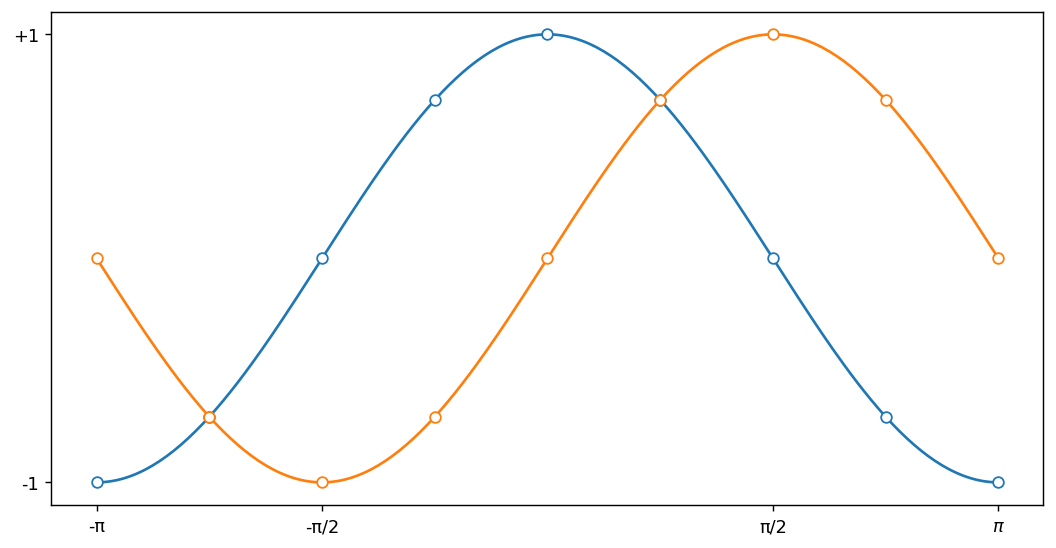

In [8]:
fig,ax = plt.subplots()

ax.plot(X, C, marker="o", markevery=(0, 32), markerfacecolor="white")
ax.plot(X, S, marker="o", markevery=(0, 32), markerfacecolor="white")

# Set the x/y ticks and their labels
ax.set_xticks([-np.pi, -np.pi/2, np.pi/2, np.pi])
ax.set_xticklabels(["-π", "-π/2", "π/2", "$π$"])
ax.set_yticks([-1,1])
ax.set_yticklabels(["-1", "+1"])

plt.show();

#### Spines position

Spines are the four lines around our figure and delimiting the data area. Byt default, there are four spines at top/bottom and left/right but we can hide some of them and move the others. Since there are four of them (top/bottom/left/right), we'll hide the top and right and we'll move the bottom and left ones to coordinate 0 (in data space coordinates).

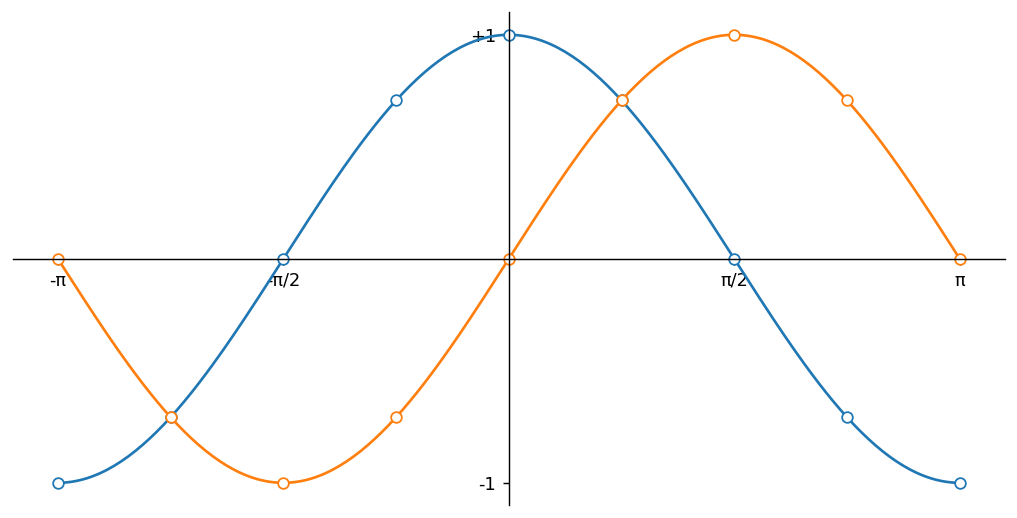

In [9]:
fig,ax = plt.subplots()

ax.plot(X, C, marker="o", markevery=(0, 32), markerfacecolor="white")
ax.plot(X, S, marker="o", markevery=(0, 32), markerfacecolor="white")

ax.set_xticks([-np.pi, -np.pi/2, np.pi/2, np.pi])
ax.set_xticklabels(["-π", "-π/2", "π/2", "π"])
ax.set_yticks([-1, 1])
ax.set_yticklabels(["-1",  "+1"])

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the bottom and left positions to the center of the figure
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

plt.show();

#### Z order

Now that our spines overlap our lines, we can see that the axes are plotted on top the lines. It was already the case previosuly but it was less noticeable. Now with the markers, it is more obvious and pretty annoying. To fix the problem, we need to tell matplotlib to render our sine and cosine plots in front of the axis. To do so, we need to specify a zorder that specify the order of rendering. Elements are rendererd in increasing zorder.

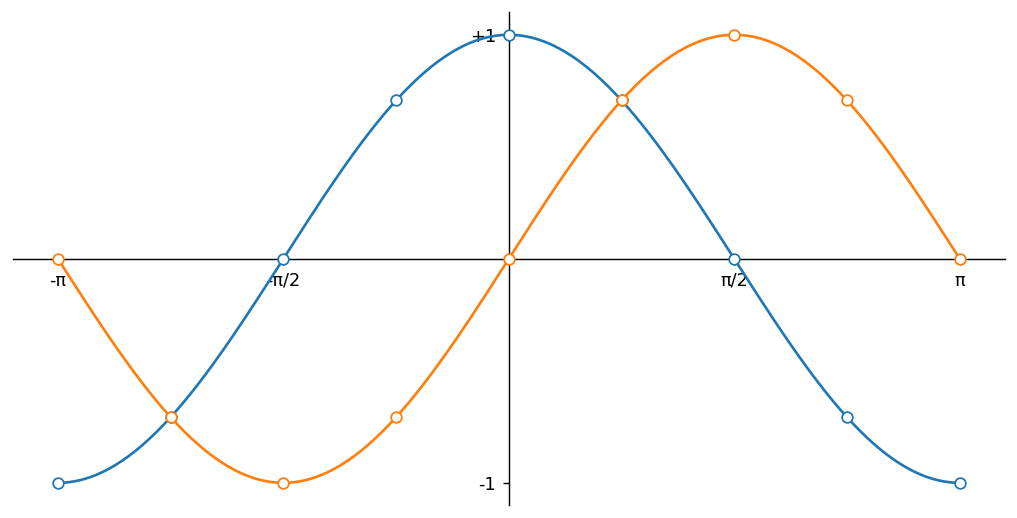

In [10]:
fig,ax = plt.subplots()

ax.plot(X, C, marker="o", markevery=(0, 32), markerfacecolor="white",
              zorder=10)
ax.plot(X, S, marker="o", markevery=(0, 32), markerfacecolor="white",
              zorder=10)

ax.set_xticks([-np.pi, -np.pi/2, np.pi/2, np.pi])
ax.set_xticklabels(["-π", "-π/2", "π/2", "π"])
ax.set_yticks([-1, 1])
ax.set_yticklabels(["-1", "+1"])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))


plt.show();

#### Legend

Matplotlib allows adding legends with [a great degree of control](https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html). For now, we will add a simple legend in the upper left-hand corner. We do this by labelling the data we plot (i.e., adding the keyword argument `label` into our `plot` function) and then calling `ax.legend`.

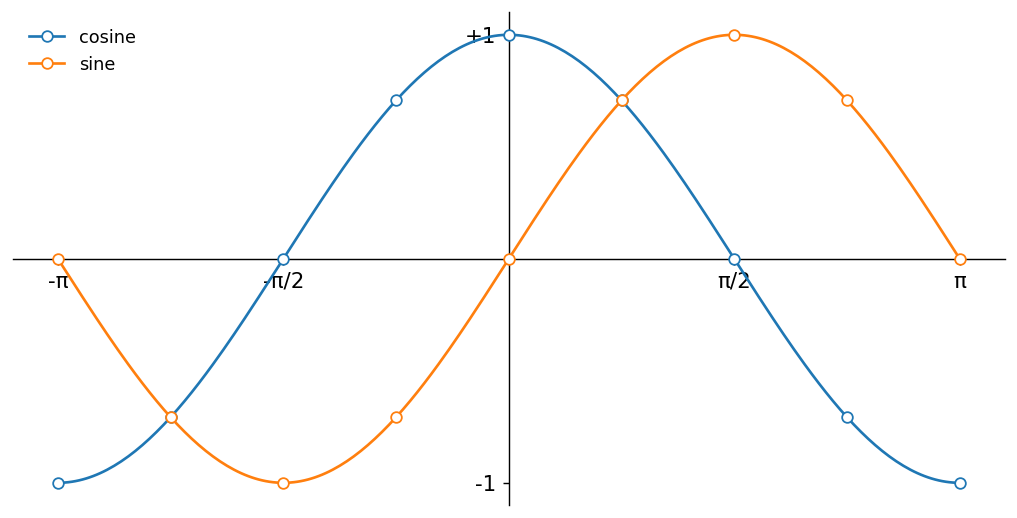

In [11]:
fig,ax = plt.subplots()

ax.plot(X, C, marker="o", markevery=(0, 32), markerfacecolor="white",
              zorder=10, label="cosine")
ax.plot(X, S, marker="o", markevery=(0, 32), markerfacecolor="white",
              zorder=10, label="sine")

ax.set_xticks([-np.pi, -np.pi/2, np.pi/2, np.pi])
ax.set_xticklabels(["-π", "-π/2", "π/2", "π"])
ax.set_yticks([-1, 1])
ax.set_yticklabels(["-1", "+1"])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

ax.legend(loc='upper left', frameon=False);

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize("large");

plt.show();

#### Font size

The font size of the tick labels is a bit small. Let's increase it a bit.

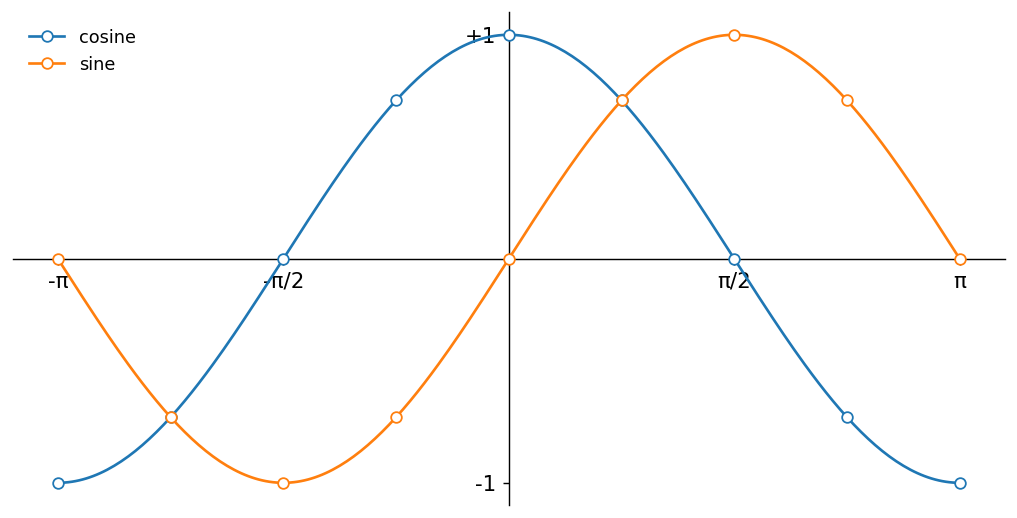

In [12]:
fig,ax = plt.subplots()

ax.plot(X, C, marker="o", markevery=(0, 32), markerfacecolor="white",
              zorder=10, label="cosine")
ax.plot(X, S, marker="o", markevery=(0, 32), markerfacecolor="white",
              zorder=10, label="sine")

ax.set_xticks([-np.pi, -np.pi/2, np.pi/2, np.pi])
ax.set_xticklabels(["-π", "-π/2", "π/2", "π"])
ax.set_yticks([-1, 1])
ax.set_yticklabels(["-1", "+1"])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

ax.legend(loc='upper left', frameon=False);

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize("large");

plt.show();

#### Title

We're almost done. Let's now add a title on the left of our figure.

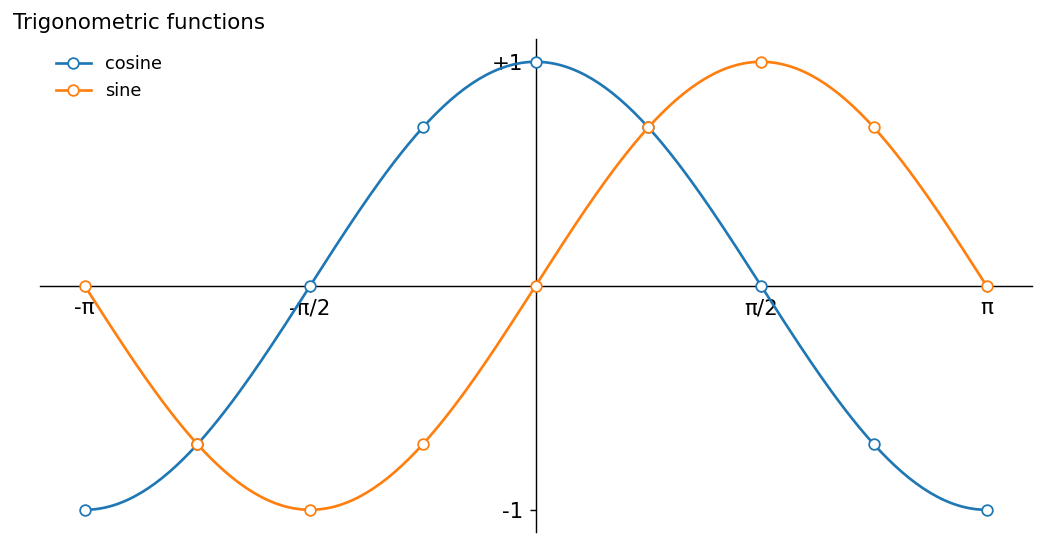

In [13]:
fig,ax = plt.subplots()

ax.plot(X, C, marker="o", markevery=(0, 32), markerfacecolor="white",
              zorder=10, label="cosine")
ax.plot(X, S, marker="o", markevery=(0, 32), markerfacecolor="white",
              zorder=10, label="sine")

ax.set_xticks([-np.pi, -np.pi/2, np.pi/2, np.pi])
ax.set_xticklabels(["-π", "-π/2", "π/2", "π"])
ax.set_yticks([-1, 1])
ax.set_yticklabels(["-1", "+1"])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

ax.legend(loc='upper left', frameon=False);
ax.set_title("Trigonometric functions", x=0.1)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize("large")
    
plt.show();

### 2.4.3 Saving the result

We can now save our figure in a file. There are many different figure formats, but vector graphics will produce a figure that is flawless independently of the zoom level. So let's save to a PDF.

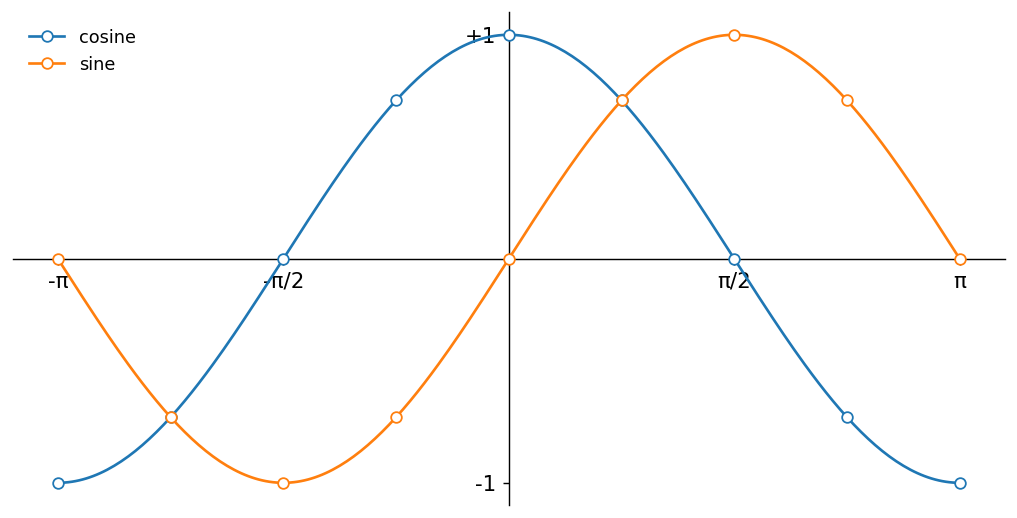

In [30]:
fig, ax = plt.subplots()

ax.plot(X, C, marker="o", markevery=(0, 32), markerfacecolor="white",
              zorder=10, label="cosine")
ax.plot(X, S, marker="o", markevery=(0, 32), markerfacecolor="white",
              zorder=11, label="sine")

ax.set_xticks([-np.pi, -np.pi/2, np.pi/2, np.pi])
ax.set_xticklabels(["-π", "-π/2", "π/2", "π"])
ax.set_yticks([-1, 1])
ax.set_yticklabels(["-1", "+1"])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

ax.legend(loc='upper left', frameon=False);

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize("large");

plt.savefig("./dataviz-data/01-introduction.pdf")

plt.show();


---

#  3. Multiple axes <a name="multiple_axes"></a> <span style="float:right;"><a class="small" style="color:black; text-decoration: none;" href="#TOC">[Back to TOC]</a></span>

So far, we've been dealing with a single axes  on a figure, but of course, Matplotlib offers the possibility to draw several plots on the same figure. The only difficulty is to express the layout of these different plots. But let's start with someting simple first.

We want to split our sine and cosine plot in two different plots side by side. To do that we need to create two axes. The most straigthforward way is to use the `plt.subplots` method to create subplots with the specified rows and colums. This method returns an array of axes that you can index to access the axes of your choice. You can also use the `plt.subplot` method, which is similar to the Matlab `subplot` function.

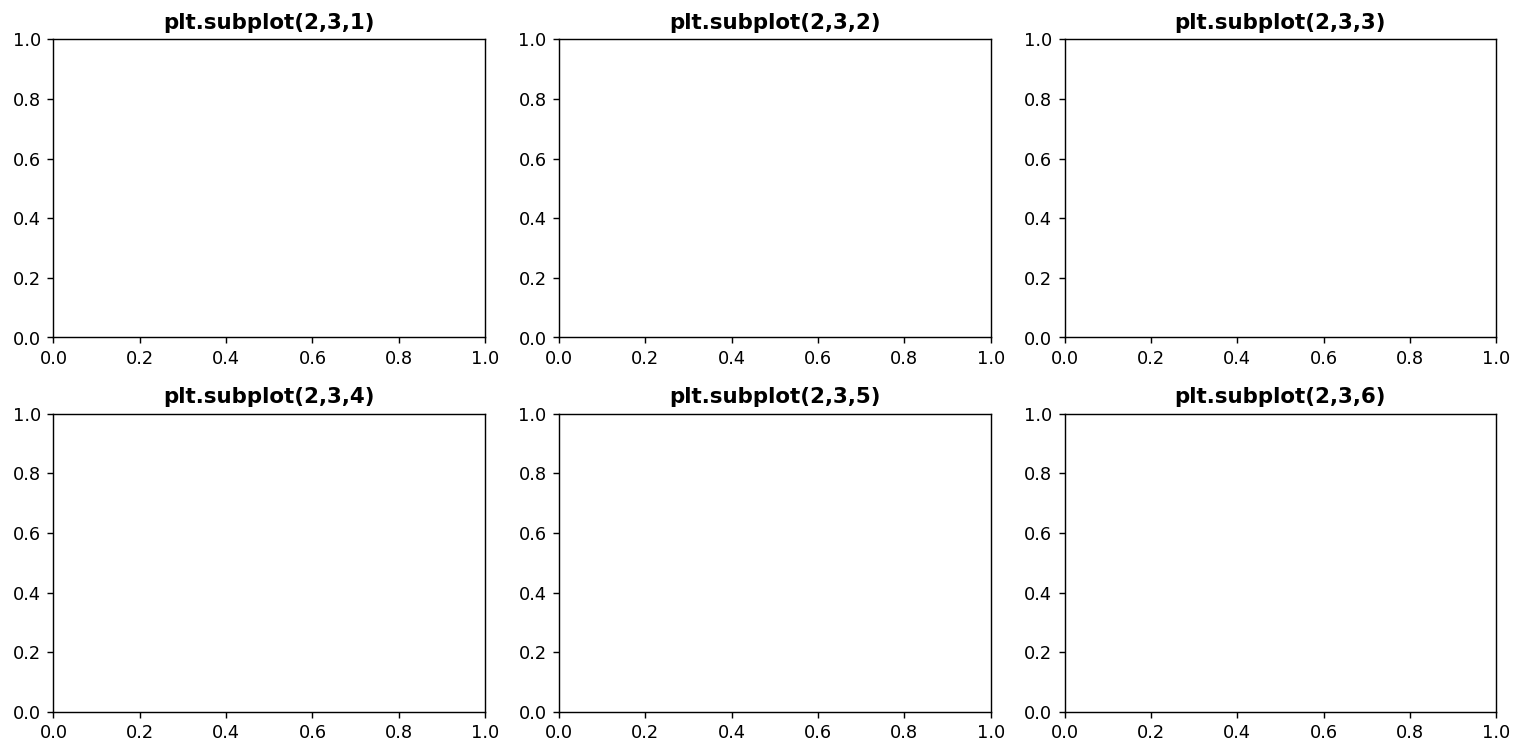

In [34]:
nrows, ncols = 2, 3
fig, axs = plt.subplots(nrows, ncols, figsize=(12,6))
for index in range(nrows*ncols):
    ax = axs[index // ncols, index % ncols];
    ax.set_title("plt.subplot(%d,%d,%d)" % (nrows, ncols, index+1), weight="bold")
    
plt.tight_layout()
plt.show();

Back to our example, we need one row and two columns. Let's also move our plotting code into a function so it's easier to reuse.

In [45]:
def plot(ax, X, Y, color='C0', title=""):
    """Plot a sinusoid in a very nice way."""
    ax.plot(X,Y, c=color)
    
    ax.set_xticks([-np.pi, -np.pi/2, np.pi/2, np.pi])
    ax.set_xticklabels(["-π", "-π/2", "π/2", "π"])
    ax.set_yticks([-1, 1])
    ax.set_yticklabels(["-1", "+1"])

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['left'].set_position(('data',0))
    
    ax.set_title(title, weight="bold")

We made the function, now let's use it to plot the data.

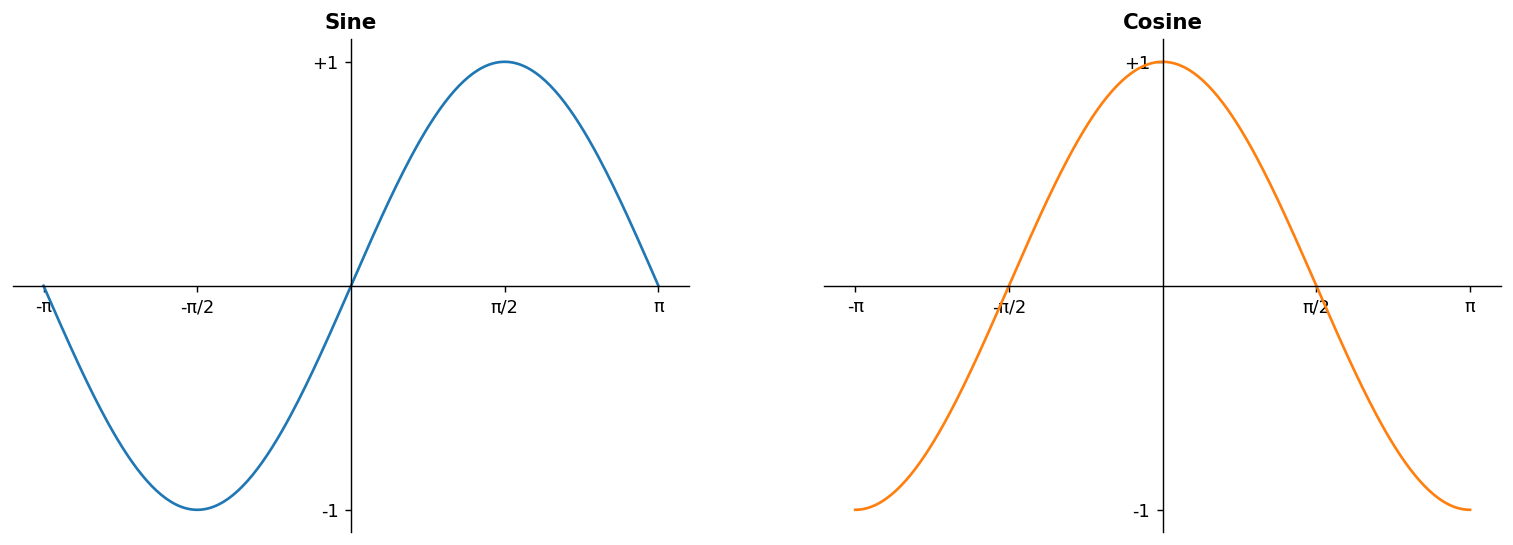

In [56]:
nrows, ncols = 1, 2
fig, axs = plt.subplots(nrows, ncols, figsize=(15,5))

plot(axs[0], X, S, color='C0', title='Sine')
plot(axs[1], X, C, color='C1', title='Cosine')

plt.show()


---

# 4.  Catalogue of useful plots <a name="catalogue"></a> <span style="float:right;"><a class="small" style="color:black; text-decoration: none; " href="#TOC">[Back to TOC]</a></span>

In this lesson, we'll review a few of the many different types of plot matplotlib offers and manipulate them.


<img src="dataviz-data/plot-basic.png" width="50%" align="right" /> <img src="dataviz-data/plot-advanced.png" width="50%" />


These images come from the [cheatsheets](https://github.com/matplotlib/cheatsheets).


## 4.1 Line plot <a name="line_plot"></a> <span style="float:right;"><a class="small" style="color:black; text-decoration: none; " href="#TOC">[Back to TOC]</a></span>

We have already manipulated line [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) in the first lesson but we used it to render a... line plot (how surprising!). But this command is actually much more powerful and it can be used to render many other types of plot such as, for example, a **scatter plot**.

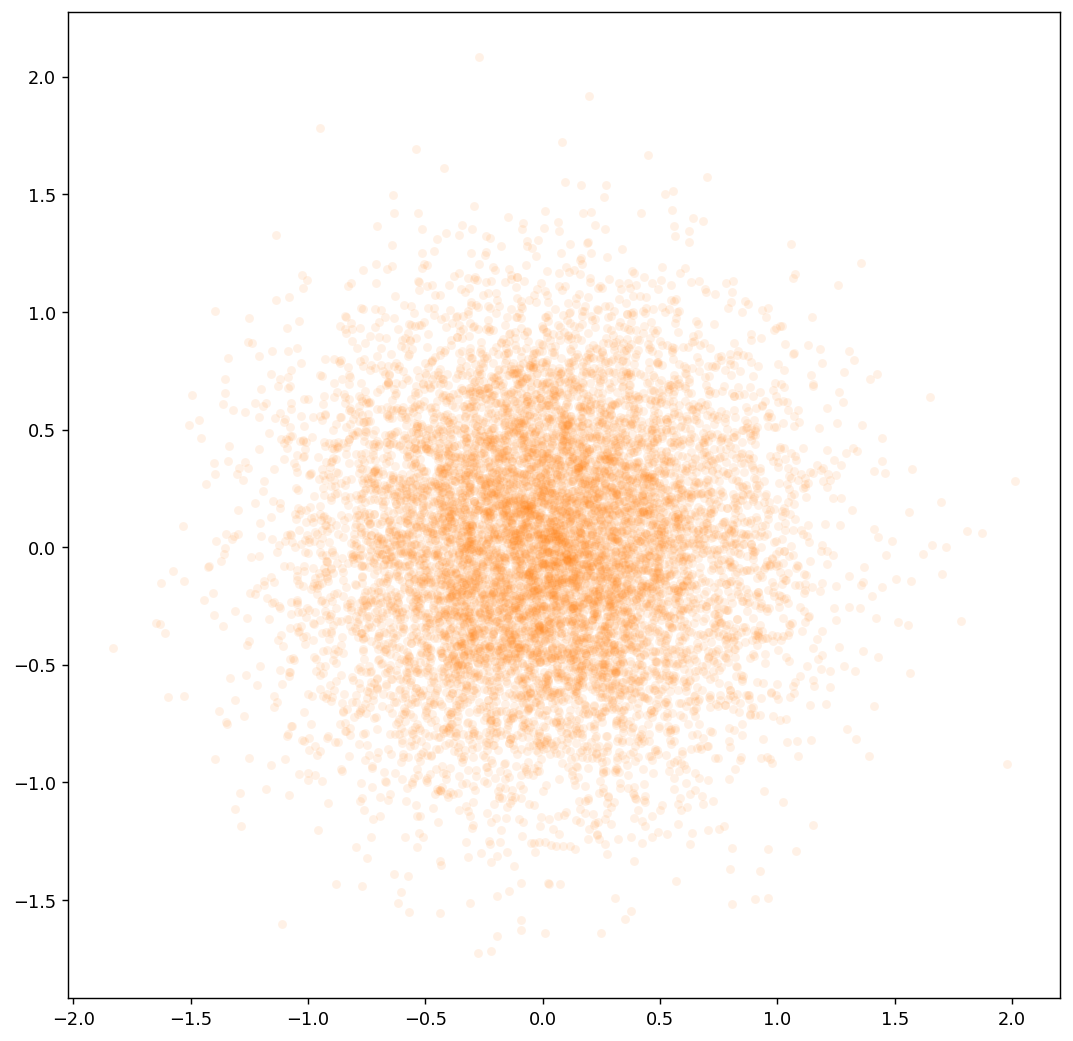

In [64]:
# Generate some random data following the Normal distribution
X = np.random.normal(0.0, .5, 10000)
Y = np.random.normal(0.0, .5, len(X))

# Make a figure
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(X, Y, linestyle="", color="C1", alpha=0.1,
              marker="o", markersize=5, markeredgewidth=0)

plt.show();

In the figure above, we took advantage of the `alpha` parameter that sets the transparency level of markers. Consequently, areas with a higher number of point will be more opaque, suggesting density to the reader.

## 4.2 Scatter plot <a name="scatter_plot"></a> <span style="float:right;"><a class="small" style="color:black; text-decoration: none; " href="#TOC">[Back to TOC]</a></span>

We have just seen that the `plot` command can be used to draw a scatter plot and yet, there exists a [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) function. You may ask yourself what is the different between these two functions. In fact, the regular plot command can be used to represent as scatter plot as long as points share the same properties, i.e. share the same color and size. If for some reason we need to have different colors or sizes, then we need to use the scatter command.

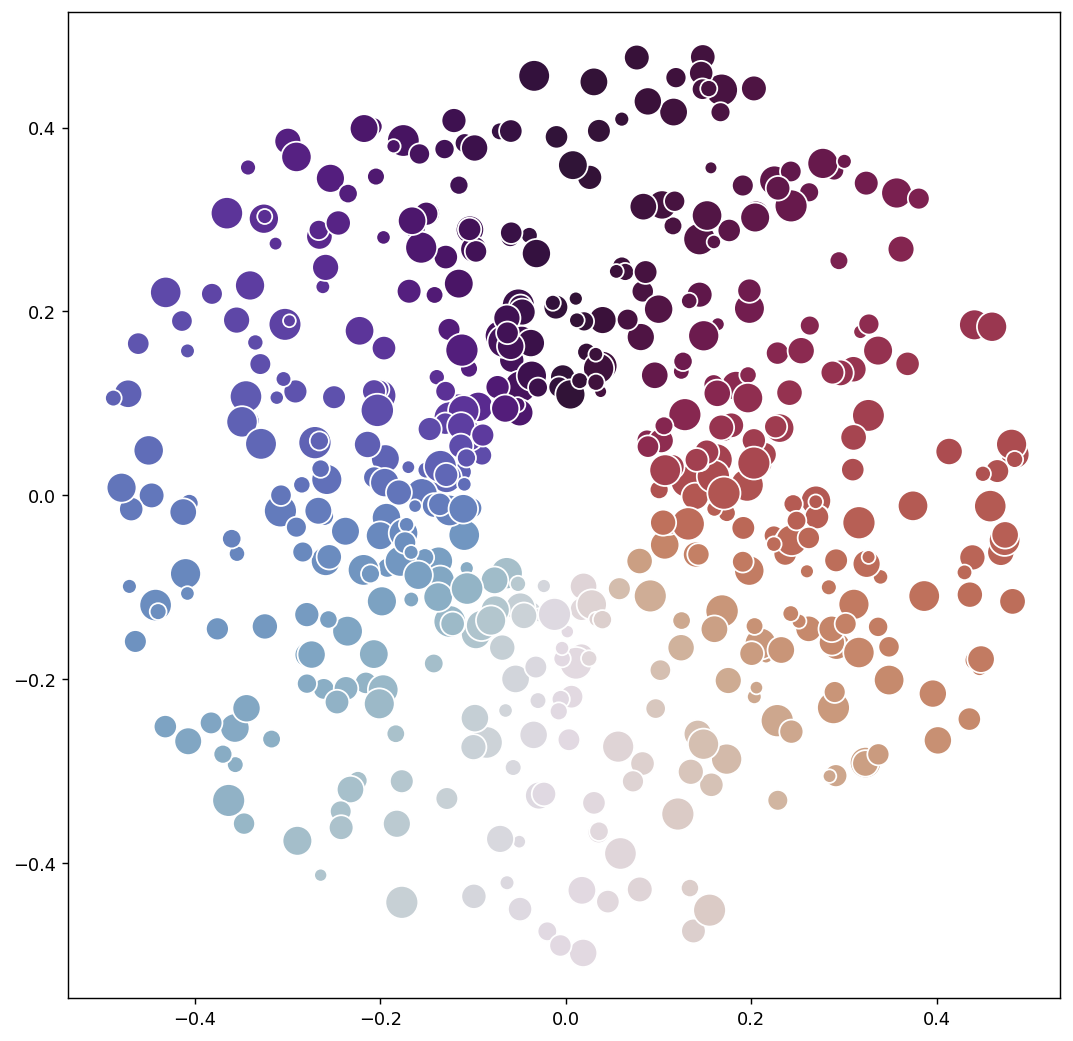

In [65]:
T = np.random.uniform(0, 2*np.pi, 500)
R = np.random.uniform(0.1, 0.5, len(T))
X, Y = R*np.cos(T), R*np.sin(T)        # Position
S = np.random.uniform(50, 350, len(X)) # Size
V = np.arctan2(X,Y)                    # Value 

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(1, 1, 1)
ax.scatter(X, Y, S, V, cmap="twilight", edgecolor="white")

plt.show();

In the example above, each marker possesses its own size and color (using a colormap based on point angle). We could even specify individual marker type.

Scatter can thus be used to produce heat map veary easily as shown below.

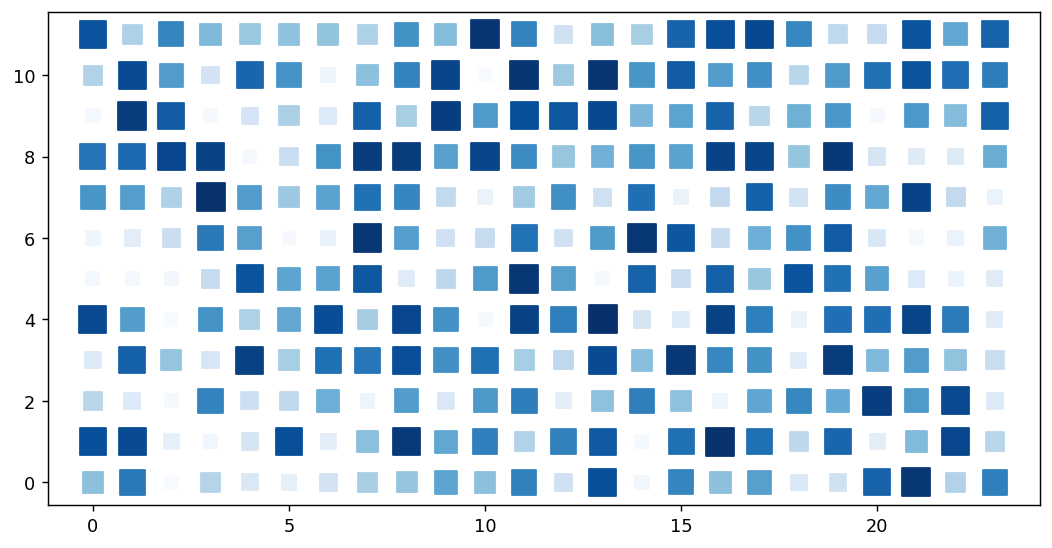

In [66]:
np.random.seed(1);
X, Y = np.arange(24), np.arange(12)
X, Y = np.meshgrid(X,Y)
V = np.random.uniform(50, 250, X.shape) 

fig = plt.figure(figsize=(10,5))
ax = plt.subplot()
ax.scatter(X, Y, V, V, marker='s', cmap="Blues")

plt.show();

## 4.3 Bar plot <a name="bar_plot"></a> <span style="float:right;"><a class="small" style="color:black; text-decoration: none; " href="#TOC">[Back to TOC]</a></span>

We'll finish this lesson with [bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) plots that are omnipresent in the scientific litterature in order to represent quantities or histograms.


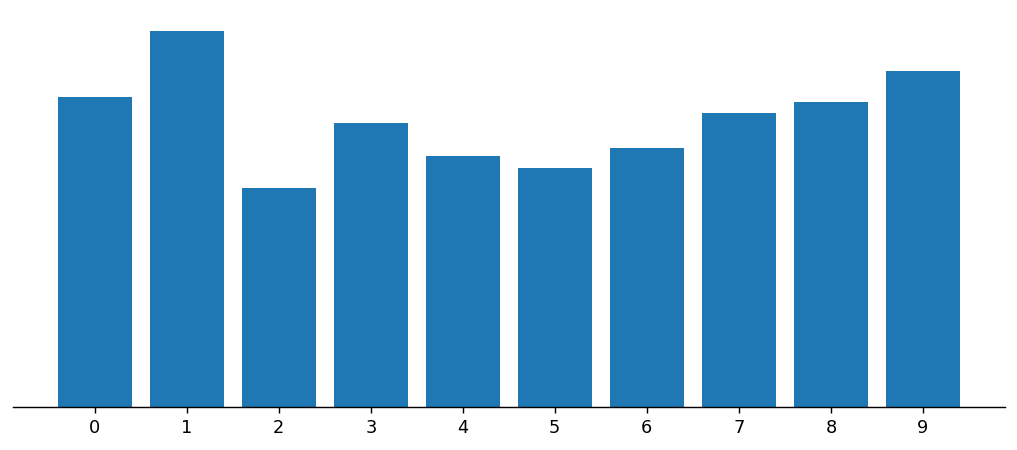

In [67]:
np.random.seed(1)
X = np.arange(0,10)
Y = np.random.uniform(0.5, 1.0, len(X))

fig = plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.bar(X, Y)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(X)
ax.set_yticks([])

plt.show();

When your date represents a mean, it is quite common to represent the standard deviation using an error bar.

np.random.seed(1)
X = np.arange(0,10)
Y = np.random.uniform(0.5, 1.0, (len(X),10))

fig = plt.figure(figsize=(10,4))
ax = plt.subplot();

ax.bar(X, Y.mean(axis=1), color="C0", yerr=Y.std(axis=1), 
       error_kw=dict(ecolor="C0", linewidth=3, capsize=5, capthick=3))

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(X)
ax.set_yticks([])

plt.show();

It is also common to have several series that need to be grouped. To do that, we can use several bar plots and play with the X coordinate.

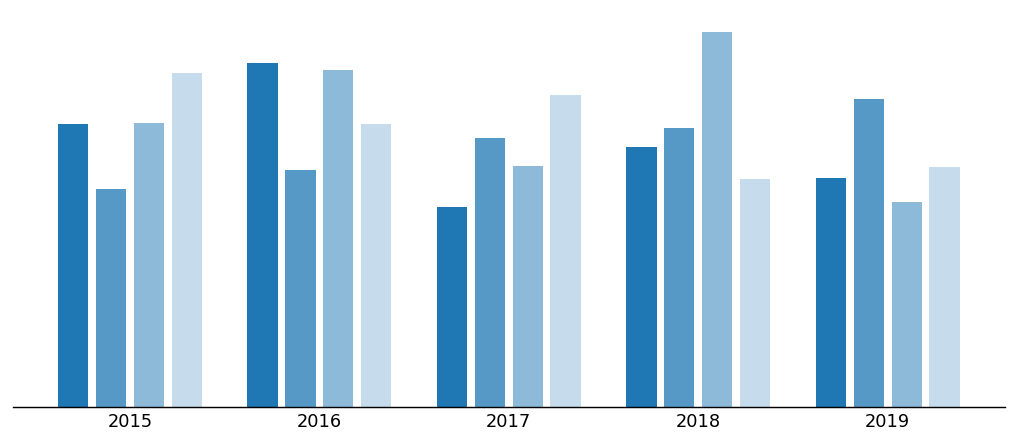

In [68]:
np.random.seed(1)
X = np.arange(0,5)
Y1 = np.random.uniform(0.5, 1.0, len(X))
Y2 = np.random.uniform(0.5, 1.0, len(X))
Y3 = np.random.uniform(0.5, 1.0, len(X))
Y4 = np.random.uniform(0.5, 1.0, len(X))
       
fig = plt.figure(figsize=(10,4));
ax = plt.subplot();

ax.bar(X*5,   Y1, color="C0", alpha=1.00)
ax.bar(X*5+1, Y2, color="C0", alpha=0.75)
ax.bar(X*5+2, Y3, color="C0", alpha=0.50)
ax.bar(X*5+3, Y4, color="C0", alpha=0.25)

ax.set_xticks(X*5+1.5)
ax.set_xticklabels(["2015","2016","2017","2018","2019"])
ax.set_yticks([])

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='x', size=0)

plt.show();

Bar plot can be also oriented horizontally using the `barh` function.

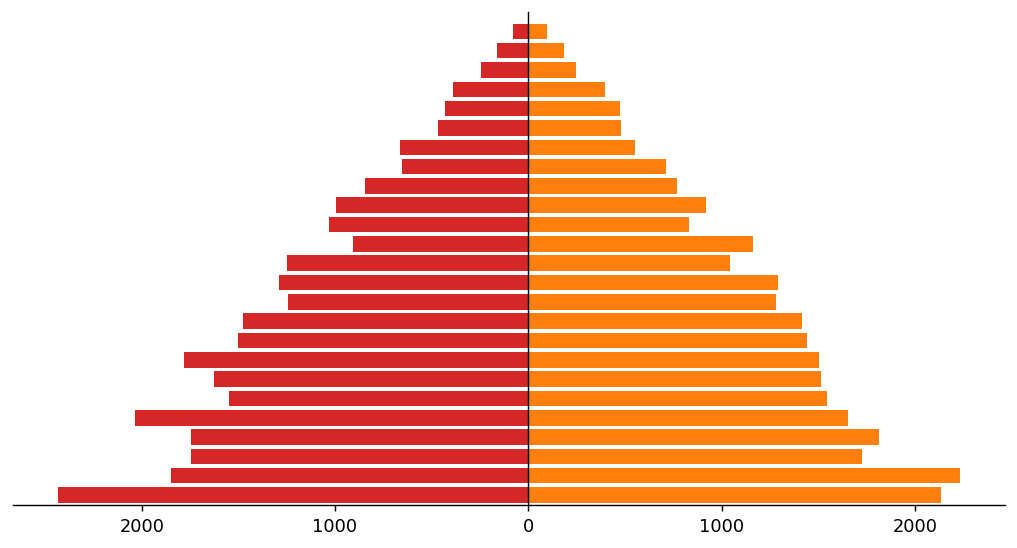

In [69]:
np.random.seed(1)
X = np.arange(0,25)
Y1 = np.random.uniform(75, 100, len(X))*(25-X)
Y2 = np.random.uniform(75, 100, len(X))*(25-X)

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(1,1,1);

ax.barh(X, +Y1, color="C1")
ax.barh(X, -Y2, color="C3")

ax.spines['right'].set_visible(False);
ax.spines['top'].set_visible(False);
ax.spines['left'].set_position(("data",0))

ax.set_ylim(-0.5, len(X))
ax.set_xticks([-2000,-1000,0, 1000,2000]);
ax.set_xticklabels(["2000","1000","0", "1000","2000"])
ax.set_yticks([])

plt.show();